<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/pneumoniaUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the dependencies
!pip install kaggle 

In [4]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"3a04ddf4f6078c568e6bfd764239be34"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d balnyaupane/pneumonia-chest-xray-dataset-200-by-200-image -p /content

 92% 155M/168M [00:01<00:00, 79.4MB/s]
100% 168M/168M [00:02<00:00, 85.0MB/s]


In [8]:
!unzip -uq "/content/pneumonia-chest-xray-dataset-200-by-200-image.zip" -d "/content/Dataset"

In [10]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

In [11]:
classifier = Sequential()

#step1-convolution
# classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(128,(3,3),input_shape=(200,200,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))

#adding second Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(MaxPooling2D((2,2)))

#adding third Convolution layer
classifier.add(Convolution2D(512,(3,3),activation='relu'))
classifier.add(MaxPooling2D((2,2)))


#step3-flattening
classifier.add(Flatten())

#step4-full connection
classifier.add(Dense(activation='relu',units=512))

classifier.add(Dense(activation='relu',units=128))

classifier.add(Dense(activation='relu',units=128))

classifier.add(Dense(activation='sigmoid',units=1))


In [12]:
#compiling the cnn
classifier.compile(optimizer='rmsprop' , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/train',
        target_size=(200, 200),
        batch_size=64,
        color_mode='grayscale',
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/test',
        target_size=(200, 200),
        batch_size=64,
        color_mode='grayscale',
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

# summarize model.
classifier.summary()


Found 10432 images belonging to 2 classes.
training_set.class_indices:    {'normal': 0, 'pneumonia': 1}
Found 1248 images belonging to 2 classes.
test_set.class_indices:    {'Normal': 0, 'pneumonia': 1}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 512)       1180160   
_________________________________________________

In [13]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=163,
        epochs=50,
        validation_data=test_set,
        validation_steps=20)

Epoch 1/50
163/163 [==============================] - 52s 320ms/step - loss: 1.0863 - accuracy: 0.7619 - val_loss: 0.8620 - val_accuracy: 0.6955
Epoch 2/50
163/163 [==============================] - 45s 274ms/step - loss: 0.3170 - accuracy: 0.8765 - val_loss: 0.7016 - val_accuracy: 0.8157
Epoch 3/50
163/163 [==============================] - 45s 274ms/step - loss: 0.2347 - accuracy: 0.9085 - val_loss: 0.4878 - val_accuracy: 0.8670
Epoch 4/50
163/163 [==============================] - 45s 275ms/step - loss: 0.1952 - accuracy: 0.9282 - val_loss: 2.6749 - val_accuracy: 0.7179
Epoch 5/50
163/163 [==============================] - 45s 275ms/step - loss: 0.1791 - accuracy: 0.9356 - val_loss: 0.2833 - val_accuracy: 0.9215
Epoch 6/50
163/163 [==============================] - 45s 274ms/step - loss: 0.1578 - accuracy: 0.9465 - val_loss: 0.0870 - val_accuracy: 0.8510
Epoch 7/50
163/163 [==============================] - 45s 276ms/step - loss: 0.1478 - accuracy: 0.9485 - val_loss: 0.6906 - val_ac

In [14]:
# list all data in history
print(History.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


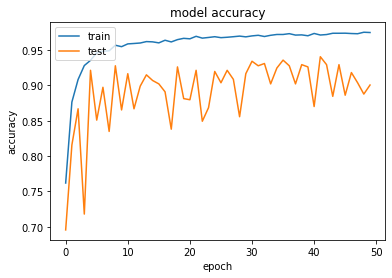

In [15]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

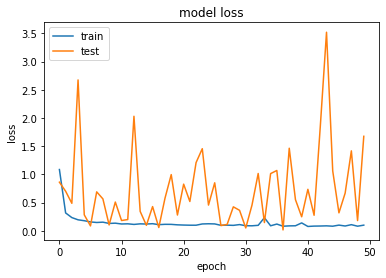

In [16]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
classifier.save_weights('pneumoniaUsingCNN_weights.h5')
with open('pneumoniaUsingCNN_architecture.json', 'w') as f:
    f.write(classifier.to_json())

In [18]:
# Load Weights + Architecture
with open('pneumoniaUsingCNN_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('pneumoniaUsingCNN_weights.h5')

In [20]:
#compiling the cnn
loaded_model.compile(optimizer='rmsprop' , loss='binary_crossentropy',metrics=['accuracy'])

loaded_model.evaluate_generator(training_set,steps=32,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=0)
loaded_model.evaluate_generator(test_set,steps=32,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=0)
print(loaded_model.metrics_names)


['loss', 'accuracy']


Confusion Matrix


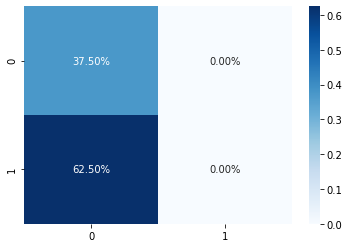

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
test_set.classes
Y_pred = loaded_model.predict_generator(test_set,steps=20)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cnf_matrix=confusion_matrix(test_set.classes, y_pred)
#print(confusion_matrix(test_set.classes, y_pred))

import seaborn as sns
#sns.heatmap(cnf_matrix, annot=True)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,fmt='.2%', cmap='Blues')